# 🌤️ Kemarin adem, hari ini gerah!
## Yuk kita prediksi suhu di Indonesia menggunakan Machine Learning.

Selamat datang di tutorial memprediksi suhu rata-rata di Indonesia, menggunakan machine learning! <br>
Dalam proyek ini, kita akan melalui semua tahapan—dari eksplorasi dataset cuaca, pelatihan model, hingga evaluasi hasil menggunakan visualisasi yang informatif.

## 📁 Dataset
Kita akan bekerja dengan dataset cuaca yang berisi data cuaca per jam seperti suhu, lama penyinaran matahari, dan informasi lainnya.<br>
Berikut adalah informasi kolom dari dataset **"climate_data.csv"** yang ada di directory project ini.<br>
Data suhu dari semua wilayah indonesia mulai tahun 2010 sampai 2020.

**Feature	Description**
- Tn :	min temperature (°C)
- Tx :	max temperature (°C)
- Tavg :	avg temperature (°C)
- RH_avg :	avg humidity (%)
- RR :	rainfall (mm)
- ss :	duration of sunshine (hour)
- ff_x :	max wind speed (m/s)
- ddd_x :	wind direction at maximum speed (°)
- ff_avg :	avg wind speed (m/s)
- ddd_car :	most wind direction (°)
- station_id :	station id which record the data. Detail of the station can be found in station_detail.csv

## 📌 Tujuan
Memprediksi suhu rata-rata harian berdasarkan data cuaca historis dengan target RMSE (Root Mean Square Error) di bawah 3°C.

## 🔍 Langkah 1: Exploratory Data Analysis (EDA)
Pada tahap ini, kita melakukan analisis awal terhadap data:
- Mengonversi kolom date menjadi format datetime.
- Mengekstrak fitur day, month, dan year dari tanggal.
- Menampilkan heatmap untuk memeriksa nilai yang hilang.
- Mengelompokkan data berdasarkan tahun dan bulan untuk melihat tren suhu dari waktu ke waktu.
- Membuat visualisasi garis untuk suhu rata-rata bulanan.
- Menampilkan heatmap korelasi antar fitur untuk memahami hubungan antar variabel.

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Konversi data csv menjadi dataframe dan disimpan ke dalam variable "df"
df = pd.read_csv('climate_data.csv')

# Menampilkan 10 data teratas
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [2]:
# Mengecek informasi dasar dari dataset (nama kolom, null values, data type, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB


In [3]:
# Mengkonversi kolom 'date' menjadi format 'datetime'
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Mengekstrak fitur day, month, dan year dari kolom 'date'.
df['day'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,day,month,year
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,1,1,2010
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,2,1,2010
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,3,1,2010
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,4,1,2010
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,5,1,2010


Text(69.58333333333333, 0.5, 'Count')

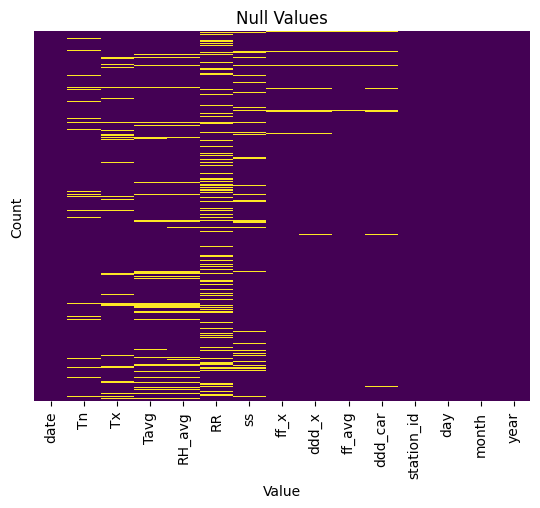

In [4]:
# Visualisasi missing values menggunakan heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels = False)

plt.title('Null Values')
plt.xlabel('Value')
plt.ylabel('Count')

C:\Users\yovan.alvianto\AppData\Local\Temp\ipykernel_21824\1378470806.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='Tavg', data=weather_per_month, ci=None)


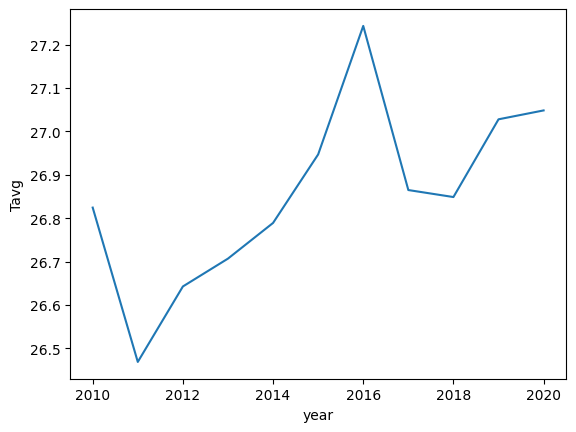

In [5]:
# Menyimpan fitur yang diperlukan ke dalam variable 'weather_metrics'
weather_metrics = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'station_id']

# Mengelompokkan rata-rata dari masing-masing kolom berdasarkan 'year' dan 'month'
weather_per_month = df.groupby(['year', 'month'], as_index=False)[weather_metrics].mean()

# Membuat visualisasi line plot untuk suhu rata-rata bulanan.
sns.lineplot(x='year', y='Tavg', data=weather_per_month, ci=None)
plt.show()

<AxesSubplot: >

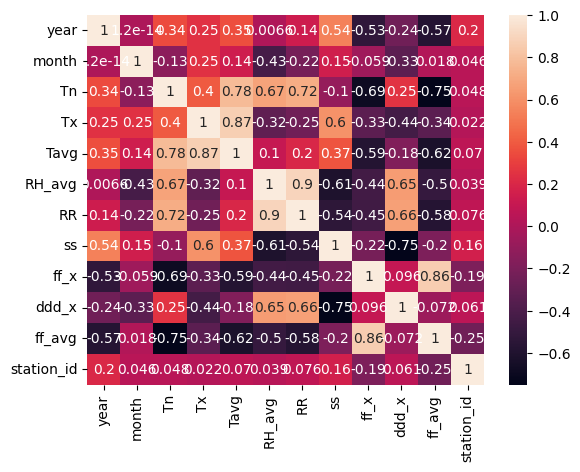

In [6]:
# Menampilkan heatmap korelasi antar fitur untuk memahami hubungan antar variabel
sns.heatmap(weather_per_month.corr(), annot=True)

## 🧠 Langkah 2: Preprocessing & Feature Selection
Selanjutnya, kita memilih fitur penting dan membersihkan data:
- Menentukan fitur yang akan digunakan sebagai input (misalnya Tx, Tn, RH_avg, dll).
- Menghapus baris yang tidak memiliki nilai target (Tavg).
- Memisahkan data menjadi data latih dan data uji.
- Melakukan imputasi pada nilai kosong dengan rata-rata.
- Melakukan feature scaling data agar model bekerja optimal.

In [7]:
# Menentukan fitur yang akan digunakan sebagai input (misalnya Tx, Tn, RH_avg, dll)
feature_selection = ['month', 'Tn', 'Tx', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Menyimpan target suhu rata-rata ke dalam variabel 'target_var'
target_var = 'Tavg'

# Menghapus baris yang tidak memiliki nilai target (Tavg).
df = df.dropna(subset=['Tavg'])

In [8]:
# Membuat variabel X dan y
X = df[feature_selection]
y = df[target_var]

# Memisahkan data menjadi data training dan data test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train

,month,Tn,Tx,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
315260,5,22.0,32.2,76.0,0.0,5.5,4.0,120.0,2.0
145474,10,23.0,NaN,79.0,0.9,3.5,1.0,100.0,0.0
326504,6,24.2,34.7,73.0,0.0,8.0,5.0,130.0,2.0
107090,6,23.0,33.6,77.0,NaN,7.8,3.0,250.0,1.0
500817,5,24.0,32.2,85.0,NaN,0.0,4.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...
394570,3,24.0,33.0,83.0,NaN,5.0,4.0,50.0,1.0
530009,3,16.0,24.3,87.0,4.0,1.4,9.0,140.0,2.0
507438,4,24.0,30.8,86.0,3.8,3.2,5.0,360.0,2.0
530504,7,15.0,24.0,79.0,9.3,6.4,13.0,140.0,4.0


In [9]:
# Melakukan imputasi pada missing values dengan rata-rata (mean)
imputer = SimpleImputer(strategy='mean')

# fitting data training dan transform data training dan data test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[  5.        ,  22.        ,  32.2       , ...,   4.        ,
        120.        ,   2.        ],
       [ 10.        ,  23.        ,  31.57237498, ...,   1.        ,
        100.        ,   0.        ],
       [  6.        ,  24.2       ,  34.7       , ...,   5.        ,
        130.        ,   2.        ],
       ...,
       [  4.        ,  24.        ,  30.8       , ...,   5.        ,
        360.        ,   2.        ],
       [  7.        ,  15.        ,  24.        , ...,  13.        ,
        140.        ,   4.        ],
       [  7.        ,  22.1       ,  32.4       , ...,   8.        ,
        140.        ,   3.        ]])

In [10]:
# Melakukan feature scaling data (agar data memiliki range nilai yang sama)
scaler = StandardScaler()

# fitting data training dan transform data training dan data test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-4.40323891e-01, -6.15458368e-01,  2.78306017e-01, ...,
        -2.92964905e-01, -6.49143192e-01,  1.69853080e-02],
       [ 1.00400829e+00, -1.64434199e-01,  1.57536994e-15, ...,
        -1.45221910e+00, -8.35522423e-01, -1.07028657e+00],
       [-1.51457455e-01,  3.76794805e-01,  1.38687406e+00, ...,
         9.34531599e-02, -5.55953576e-01,  1.69853080e-02],
       ...,
       [-7.29190328e-01,  2.86589971e-01, -3.42492085e-01, ...,
         9.34531599e-02,  1.58740758e+00,  1.69853080e-02],
       [ 1.37408982e-01, -3.77262755e+00, -3.35779715e+00, ...,
         3.18479768e+00, -4.62763961e-01,  1.10425719e+00],
       [ 1.37408982e-01, -5.70355951e-01,  3.66991460e-01, ...,
         1.25270735e+00, -4.62763961e-01,  5.60621248e-01]])

## 🤖 Langkah 3: Modeling
Pada tahap ini, kita melatih 3 jenis model:
1. Linear Regression
2. Decision Tree Regression dengan max_depth=10
3. Random Forest Regression dengan max_depth=10

In [ ]:
# Membuat model LinearRegression dan fitting data training
lin_reg = LinearRegression().fit(X_train, y_train)

# Membuat model Decision Tree Regression dan fitting data training
tree_reg = DecisionTreeRegressor(max_depth=10,  random_state=42).fit(X_train, y_train)

# Membuat model Random Forest Regression dan fitting data training
forest_reg = RandomForestRegressor(max_depth=10, random_state=42).fit(X_train, y_train)

In [ ]:
# Prediksi menggunakan linear regression
y_pred_lr = lin_reg.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

# Prediksi menggunakan decision tree
y_pred_tr = tree_reg.predict(X_test)
rmse_tr = mean_squared_error(y_test, y_pred_tr, squared=False)

# Prediksi menggunakan forest tree
y_pred_fr = forest_reg.predict(X_test)
rmse_fr = mean_squared_error(y_test, y_pred_fr, squared=False)

In [ ]:
print(f"RMSE Linear Regression: {rmse_lr:.2f}")
print(f"RMSE Decision Tree Regression: {rmse_tr:.2f}")
print(f"RMSE Random Forest Regression: {rmse_fr:.2f}")

RMSE Linear Regression: 0.92
RMSE Decision Tree Regression: 0.73
RMSE Random Forest Regression: 0.71


### Setelah model dilatih, kita mengevaluasi performa mereka menggunakan RMSE.<br>
### Hasil evaluasi menunjukkan bahwa model Random Forest memiliki performa terbaik dengan nilai RMSE sekitar 0.71.

## 📊 Langkah 4: Visualisasi
Kita membandingkan hasil prediksi model Random Forest dengan data aktual:
- Data prediksi dan aktual digabung ke dalam satu DataFrame berdasarkan tanggal.
- Dirata-ratakan per hari untuk mengatasi data yang semula per jam.
- Diurutkan berdasarkan tanggal dan diambil 100 data terakhir.
- Dibuat visualisasi garis untuk membandingkan nilai aktual vs prediksi dalam 100 hari terakhir.


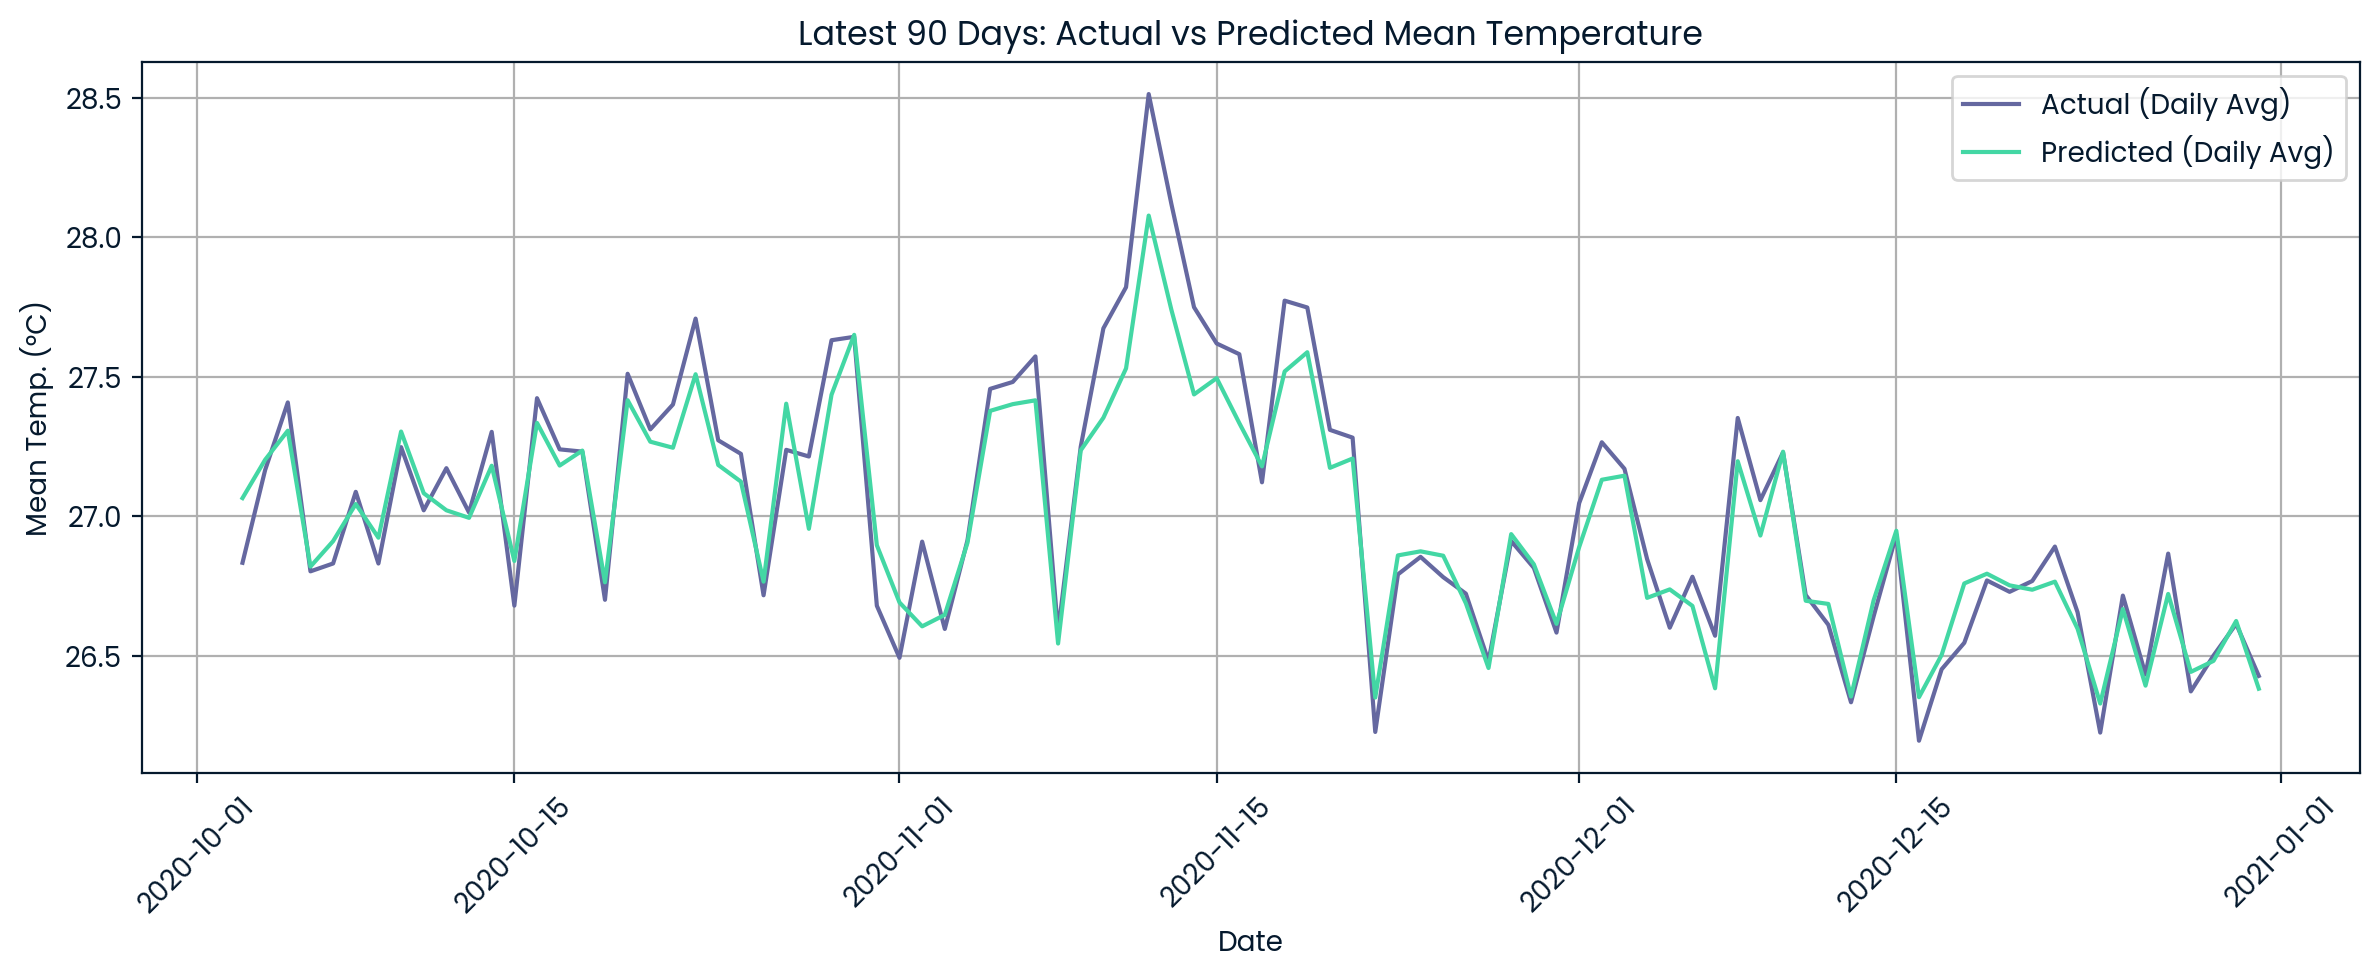

In [ ]:
# Step 1: Buat dataframe baru berisi kolom date, data actual dan hasil prediksi
results_df = pd.DataFrame({
    'date': df.loc[y_test.index, 'date'],
    'actual': y_test.values.flatten(),
    'predicted': y_pred_fr.flatten()
})

# Step 2: Extract tanggal, dan di-group berdasarkan hari (day)
results_df['day'] = results_df['date'].dt.date
daily_avg = results_df.groupby('day').mean(numeric_only=True).reset_index()

# Step 3: Urutkan berdasarkan tanggal dan ambil data 90 hari terakhir
latest_100 = daily_avg.sort_values('day').tail(90)

# Step 4: Buat visualisasi line plot untuk perbandingan
plt.figure(figsize=(12, 5))
plt.plot(latest_100['day'], latest_100['actual'], label='Actual (Daily Avg)')
plt.plot(latest_100['day'], latest_100['predicted'], label='Predicted (Daily Avg)')
plt.title('Latest 90 Days: Actual vs Predicted Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temp. (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualisasi ini memberikan gambaran bahwa prediksi cukup mendekati data aktual, membuktikan model bekerja dengan baik.

## 🚀 Pengembangan Selanjutnya
- Gunakan fitur tambahan seperti lokasi atau ketinggian.
- Lakukan hyperparameter tuning untuk meningkatkan performa model.
- Coba pendekatan time-series seperti ARIMA atau LSTM.

Author: **Databro** <br>
GitHub: **@databroid**

